# <center> APPRENTISSAGE SUPERVISE </center>
## LARTIGUE Auriane & MOUKHLIS Nabil
### 5 SDBD A2

---
### <center> KNN - K plus proches voisins </center>
---

In [6]:
from sklearn import cluster
from sklearn import metrics
from sklearn.datasets import fetch_openml 
from sklearn import datasets 
import matplotlib.pyplot as plt 

In [6]:
# Manipulation de la base de données

# print(mnist)
# print (mnist.data)
# print (mnist.target)
# len(mnist.data) 
# help(len)
# print (mnist.data.shape) 
# print (mnist.target.shape) 
# print(mnist.data.values[0]) 
# print(mnist.target[0]) 
# mnist.data.values[0][1]
# print(len(mnist.data.values[:,1])) 
# mnist.data

In [7]:
# Charger le jeu de données mnist
mnist = fetch_openml('mnist_784') # Utiliser mnist_784
mnist = datasets.fetch_openml('mnist_784')
# mnist = datasets.fetch_openml('mnist_784',as_frame=False)

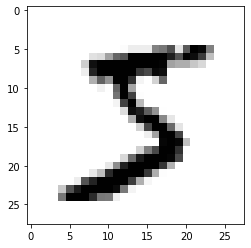

5


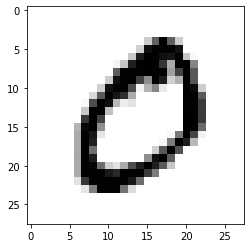

0


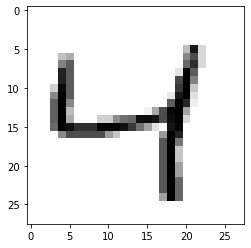

4


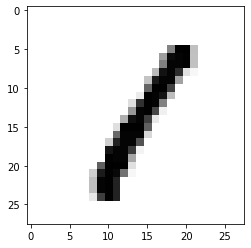

1


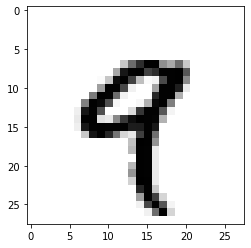

9


In [40]:
images = mnist.data.values.reshape((-1, 28, 28))
for i in range(5):
    plt.imshow(images[i],cmap=plt.cm.gray_r,interpolation="nearest") 
    plt.show()
    print(mnist.target[i]) # 

['0']
Target:  0
Score Test:  0.917
Score Train:  0.93375


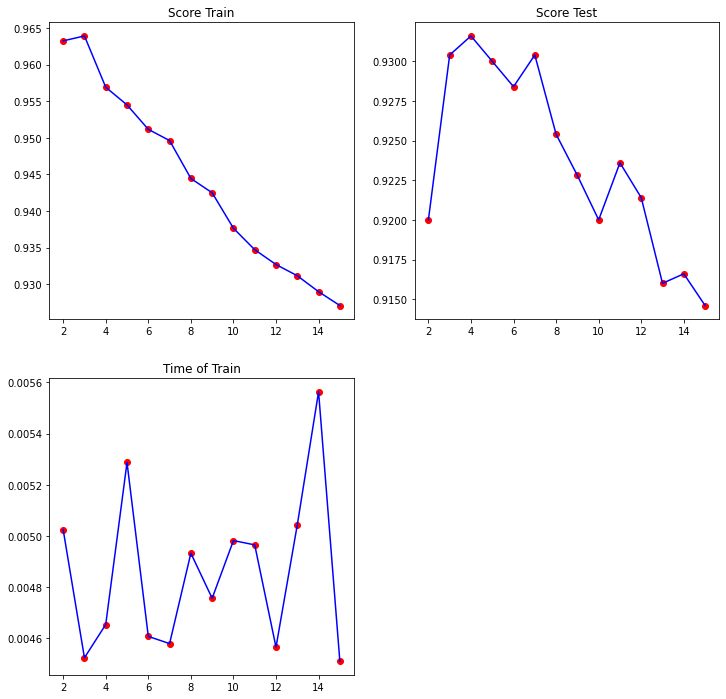

In [8]:
from sklearn import neighbors
from sklearn import model_selection
import numpy as np
import time

# Prendre un échantillon de données appelé data avec une taille de 5000 exemples 
echantillon = np.random.randint(len(mnist.data),size=5000)
data = mnist.data.values[echantillon]
target = mnist.target[echantillon]

# Diviser la base de données à 80% pour l’apprentissage (training) et à 20% pour les tests
xtrain,  xtest,  ytrain,  ytest  =  model_selection.train_test_split(data,  target, train_size=0.8)

# Entrainer un classifieur k-nn avec k = 10 sur le jeu de données chargé
n_neighbors=10
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(xtrain,ytrain)

# Afficher la classe de l’image 4 et sa classe prédite
print(clf.predict([data[4]]))
print("Target: ",target.values[4])

# Afficher le score sur l’échantillon de test
print("Score Test: ",clf.score(xtest, ytest))
print("Score Train: ",clf.score(xtrain, ytrain))

# Faire varier le nombre de voisins (k) de 2 jusqu’à 15 et afficher le score
scores_k_train=[]
scores_k_test=[]
times_k_train=[]
nb_splits=10
for k in range(2,16):
    kf = model_selection.KFold(n_splits=nb_splits, shuffle=True)
    score_train=0
    score_test=0
    time_train=0
    for train_index, test_index in kf.split(data): #On boucle sur les différents folds
        X_train, X_test = data[train_index], data[test_index]
        Y_train, Y_test = target.values[train_index], target.values[test_index]
        clf = neighbors.KNeighborsClassifier(k)
        train_start=time.time() # On mesure la durée du training
        clf.fit(X_train,Y_train)
        train_end = time.time() 
        time_train = time_train + (train_end - train_start)
        score_test = score_test + clf.score(X_test,Y_test)
        score_train = score_train + clf.score(X_train,Y_train)
    scores_k_train.append(score_train/nb_splits)
    scores_k_test.append(score_test/nb_splits)
    times_k_train.append(time_train/nb_splits)

# Graphique des scores selon le nombre de voisins choisi
plt.figure(figsize=(12,12))
plt.subplot(221,title="Score Train")
plt.plot(range(2,16),scores_k_train,c="blue")
plt.scatter(range(2,16),scores_k_train,c="red")
plt.subplot(222,title="Score Test")
plt.plot(range(2,16),scores_k_test,c="blue")
plt.scatter(range(2,16),scores_k_test,c="red")
plt.subplot(223,title="Time of Train")
plt.plot(range(2,16),times_k_train,c="blue")
plt.scatter(range(2,16),times_k_train,c="red")
plt.show()        
    

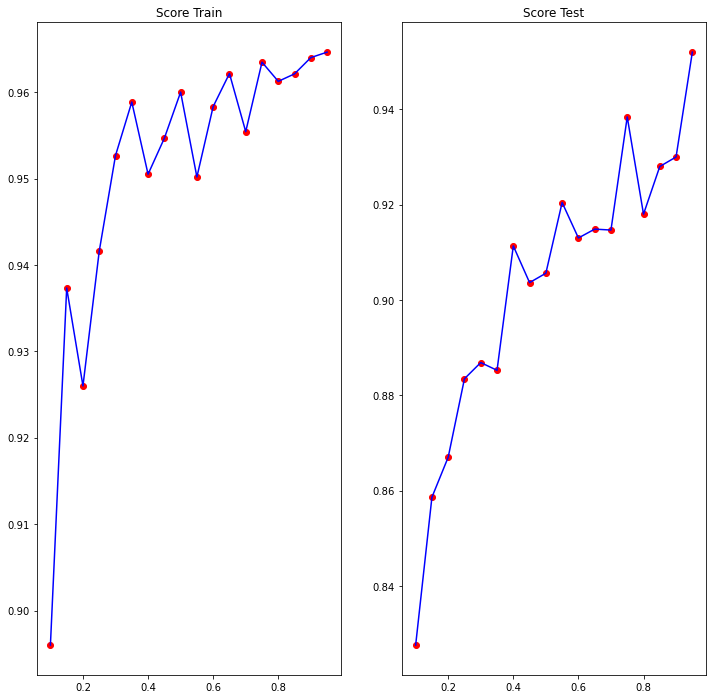

In [12]:
# Faites varier le pourcentage des échantillons (training et test) et affichez le score
scores_nb_splits_train=[]
scores_nb_splits_test=[]
nb_neigbors=3
ratios=[x/100.0 for x in range(10,100,5)]
for train_ratio in ratios:
    xtrain,  xtest,  ytrain,  ytest  =  model_selection.train_test_split(data,  target, train_size=train_ratio)
    clf = neighbors.KNeighborsClassifier(nb_neigbors)
    clf.fit(xtrain,ytrain)
    scores_nb_splits_test.append(clf.score(xtest, ytest))
    scores_nb_splits_train.append(clf.score(xtrain, ytrain))

# Graphique des scores selon le pourcentage des échantillons choisi
plt.figure(figsize=(12,12))
plt.subplot(121,title="Score Train")
plt.plot(ratios,scores_nb_splits_train,c="blue")
plt.scatter(ratios,scores_nb_splits_train,c="red")
plt.subplot(122,title="Score Test")
plt.plot(ratios,scores_nb_splits_test,c="blue")
plt.scatter(ratios,scores_nb_splits_test,c="red")
plt.show()

In [18]:
ratios=[x/100.0 for x in range(10,100,5)]
print(ratios)

[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]


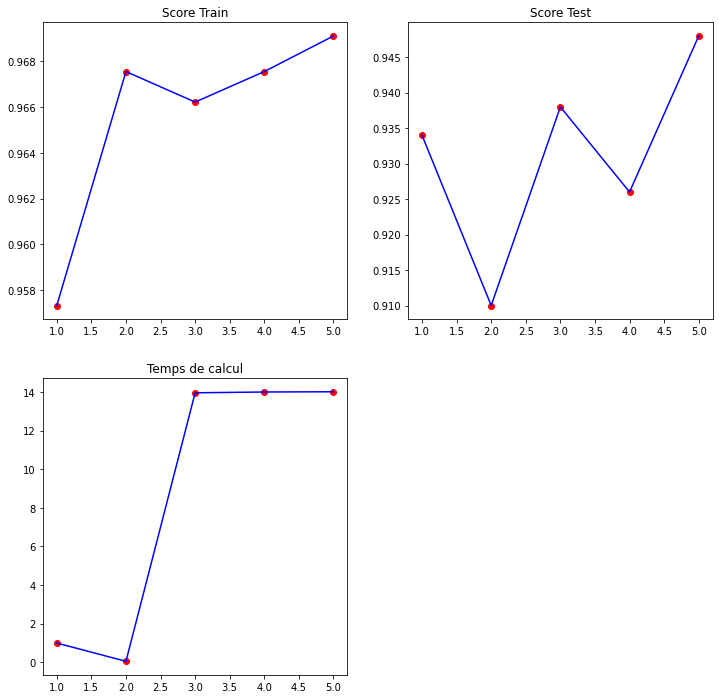

In [61]:
# Faites varier les types de distances (p)
scores_p_train=[]
scores_p_test=[]
times_p=[]
nb_neigbors=3
pmax=6
for dist in range(1,pmax):
    xtrain,  xtest,  ytrain,  ytest  =  model_selection.train_test_split(data,  target, train_size=0.90)
    clf = neighbors.KNeighborsClassifier(nb_neigbors,p=dist)
    start=time.time()
    clf.fit(xtrain,ytrain)
    clf.predict(xtest)
    end=time.time()
    scores_p_test.append(clf.score(xtest, ytest))
    scores_p_train.append(clf.score(xtrain, ytrain))
    times_p.append(end-start)

# Graphique des scores selon le type de distances (p) choisi
plt.figure(figsize=(12,12))
plt.subplot(221,title="Score Train")
plt.scatter(range(1,pmax),scores_p_train,c="red")
plt.plot(range(1,pmax),scores_p_train,c="blue")
plt.subplot(222,title="Score Test")
plt.scatter(range(1,pmax),scores_p_test,c="red")
plt.plot(range(1,pmax),scores_p_test,c="blue")
plt.subplot(223,title="Temps de calcul")
plt.scatter(range(1,pmax),times_p,c="red")
plt.plot(range(1,pmax),times_p,c="blue")
plt.show()

In [60]:
# Fixez n_job à  1 puis à -1 et calculez le temps de chacun. 
import time

time_jobs_test=[]
time_jobs_train=[]
xtrain,  xtest,  ytrain,  ytest  =  model_selection.train_test_split(data,  target, train_size=0.90)
nb_splits=10
for jobs in [-1,1]:    
    kf = model_selection.KFold(n_splits=nb_splits, shuffle=True)
    score_train=0
    score_test=0
    time_train=0
    for train_index, test_index in kf.split(data): #On boucle sur les différents folds
        X_train, X_test = data[train_index], data[test_index]
        Y_train, Y_test = target.values[train_index], target.values[test_index]
        
        clf = neighbors.KNeighborsClassifier(3,n_jobs=jobs)
        train_start=time.time() # On mesure la durée du training
        clf.fit(X_train,Y_train)
        clf.predict(X_test)
        train_end = time.time()
        
        time_train = time_train + (train_end - train_start)
    time_jobs_train.append(time_train)
    print(jobs,time_train)
# Affichage des temps de calculs
print ('job = -1: train ' , time_jobs_train[0]  )
print ('job = 1 : train ' , time_jobs_train[1]  )

-1 2.1190009117126465
1 0.5000615119934082
job = -1: train  2.1190009117126465
job = 1 : train  0.5000615119934082


---
### <center> ANN - Réseaux de neuronnes artificiels </center>
---

In [38]:
from sklearn import neighbors
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
# On conserve la même taille d'échantillon qu'au TP précedent afin de pouvoir comparer les différentes méthodes
echantillon = np.random.randint(len(mnist.data),size=5000)
data = mnist.data.values[echantillon]
target = mnist.target[echantillon]
# Diviser la base de données à 70% pour l’apprentissage (training) et à 30% pour les tests
percentage = 49000/len(mnist.data) # = 70%
xtrain,  xtest,  ytrain,  ytest  =  model_selection.train_test_split(data,target, train_size=percentage)
# Construire un modèle de classification ayant comme paramètre hidden_layer_sizes = (50)
clf = MLPClassifier(hidden_layer_sizes=(50)).fit(xtrain,ytrain)
# Calcul de la précession du classifieur 
print("Précision du train set:",clf.score(xtrain,ytrain))
print("Précision du test set:",clf.score(xtest,ytest))

Précision du train set: 0.9971428571428571
Précision du test set: 0.8373333333333334


In [39]:
# Afficher la classe de l’image 4 et sa classe prédite
print(clf.predict([data[4]]))
print("Target: ",target.values[4])

['8']
Target:  8


In [40]:
# Calculez la précision en utilisant le package precision_score
from sklearn.metrics import precision_score
precision_score(clf.predict(data),target.values,average='micro')

0.9492

In [48]:
# Varier le nombre de couches entre (2 et 100) de taille de 50 neuronnes
precisions = []

for i in range(2,30):
    layers=tuple([10 for k in range(i)])
    clf = MLPClassifier(hidden_layer_sizes=layers,max_iter=50).fit(xtrain,ytrain)
    # Recalculer la précision du classifieur
    precisions.append(precision_score(clf.predict(mnist.data.values),mnist.target.values,average='micro'))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilaye

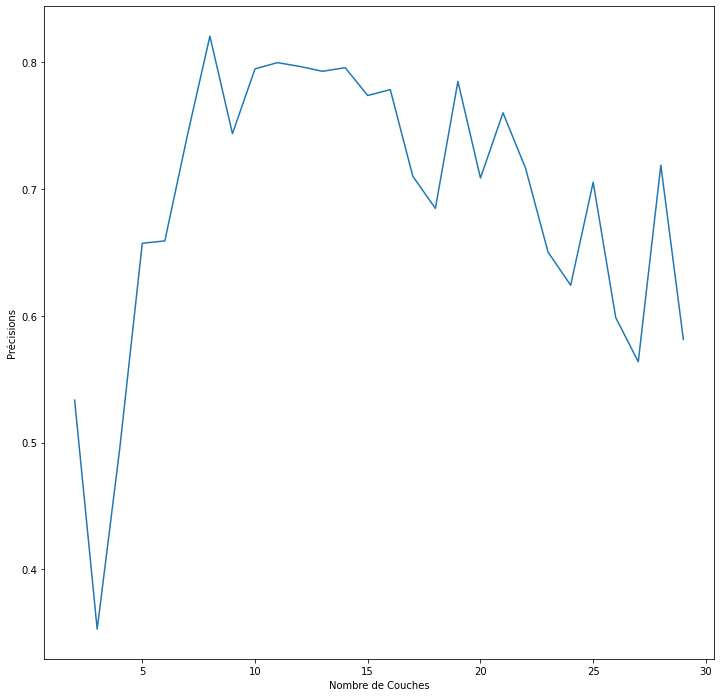

In [49]:
plt.figure(figsize=(12,12))
plt.plot(range(2,30),precisions)
plt.xlabel("Nombre de Couches")
plt.ylabel("Précisions")
plt.show()

In [91]:
import random
import time
# Construire cinq modèles de classification des données mnist, avec des 
# réseaux qui ont respectivement de 1 à 10 couches cachées, et des tailles de 
# couches entre 10 et 300 neurones au choix d’une façon aléatoire.
classifiers = []
for i in range(5):
    nb_layers=random.randint(2,11)
    layers=[random.randint(10,300) for k in range(1,nb_layers) ]
    start = time.time()
    clf = MLPClassifier(hidden_layer_sizes=layers).fit(xtrain,ytrain)
    end = time.time()
    score = precision_score(clf.predict(mnist.data.values),mnist.target.values,average='micro')
    classifiers.append((layers,score,end-start))
    print(" Couches | Moyennes neuronnes | Nb de Couche | Précision | Temps de Calcul")
    print((layers,np.mean(layers), len(layers), score ,end-start))

 Couches | Moyennes neuronnes | Nb de Couche | Précision | Temps de Calcul
([164, 139, 17, 262, 262, 95, 292, 297, 151], 186.55555555555554, 9, 0.9160857142857143, 12.423161029815674)
 Couches | Moyennes neuronnes | Nb de Couche | Précision | Temps de Calcul
([291, 206], 248.5, 2, 0.8943714285714286, 3.156826972961426)
 Couches | Moyennes neuronnes | Nb de Couche | Précision | Temps de Calcul
([94, 108, 218, 102, 95, 274, 176], 152.42857142857142, 7, 0.8947571428571428, 5.608102083206177)
 Couches | Moyennes neuronnes | Nb de Couche | Précision | Temps de Calcul
([221, 257], 239.0, 2, 0.8973428571428571, 2.325181007385254)
 Couches | Moyennes neuronnes | Nb de Couche | Précision | Temps de Calcul
([168, 273, 116, 24, 261, 276], 186.33333333333334, 6, 0.9175, 7.303976058959961)


In [129]:
# Tracez les différentes courbes d'erreurs,Temps d’apprentissage, Précision et rappel
def plot(intervalle,scores,times,recalls,errors):
    plt.figure(figsize=(16,4))
    plt.subplot(141, title = "Score")
    plt.plot(intervalle,scores,'green')
    plt.subplot(142, title = "Time")
    plt.plot(intervalle,times,'green')
    plt.subplot(143, title = "Recall")
    plt.plot(intervalle,recalls,'green')
    plt.subplot(144, title = "Error")
    plt.plot(intervalle,errors,'green')
    plt.show()

Solver  lbfgs
Score  0.9756
Recall  0.9756
Time  6.677257776260376
Error  0.024399999999999977
Solver  sgd
Iteration 1, loss = 3.63706262
Iteration 2, loss = 1.27113232
Iteration 3, loss = 0.79419387
Iteration 4, loss = 0.57249962
Iteration 5, loss = 0.42868978
Iteration 6, loss = 0.33539367
Iteration 7, loss = 0.27106903
Iteration 8, loss = 0.22122522
Iteration 9, loss = 0.18395973
Iteration 10, loss = 0.15368011
Iteration 11, loss = 0.13221813
Iteration 12, loss = 0.10991927
Iteration 13, loss = 0.09056959
Iteration 14, loss = 0.07860031
Iteration 15, loss = 0.06550727
Iteration 16, loss = 0.05908758
Iteration 17, loss = 0.04964820
Iteration 18, loss = 0.04075825
Iteration 19, loss = 0.03501685
Iteration 20, loss = 0.03008427
Iteration 21, loss = 0.02576969
Iteration 22, loss = 0.02301171
Iteration 23, loss = 0.02038875
Iteration 24, loss = 0.01730026
Iteration 25, loss = 0.01544703
Iteration 26, loss = 0.01405539
Iteration 27, loss = 0.01292053
Iteration 28, loss = 0.01171717
Iterat

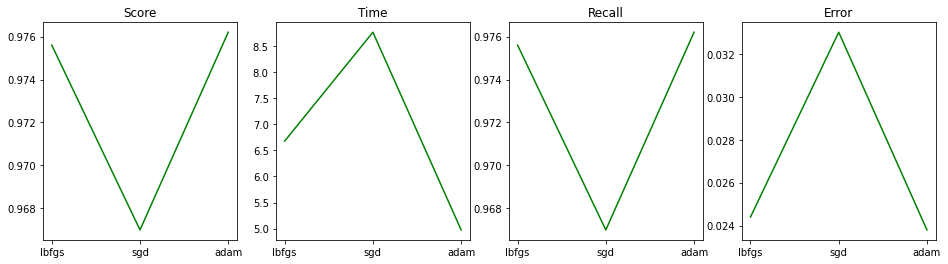

In [131]:
from sklearn.metrics import recall_score
# Étudier la convergence des algorithmes d’optimisation disponibles : L-BFGS, SGD et Adam.
solvers=['lbfgs','sgd','adam']
scores = []
times = []
recalls = []
errors = []
layers = [130,130,130,130,130,130,130,130] 
for s in solvers:
    print("Solver ",s)
    begin = time.time()
    clf = MLPClassifier(hidden_layer_sizes=layers,solver=s,verbose=True,max_iter=200).fit(xtrain,ytrain)
    end = time.time()
    score = precision_score(clf.predict(data),target.values,average='micro')
    scores.append(score)
    t = end-begin
    times.append(t)
    recall = recall_score(target,clf.predict(data),average='micro')
    recalls.append(recall)
    error = metrics.zero_one_loss(target,clf.predict(data))
    errors.append(error)
    print('Score ' , score )
    print('Recall ' , recall)
    print('Time ' , t)
    print('Error ' , error)
plot(solvers, scores, times, recalls, errors)

Iteration 1, loss = 13.91823942
Iteration 2, loss = 5.26664959
Iteration 3, loss = 3.78917997
Iteration 4, loss = 2.62410554
Iteration 5, loss = 1.98458932
Iteration 6, loss = 1.75033498
Iteration 7, loss = 1.63166263
Iteration 8, loss = 1.58134321
Iteration 9, loss = 1.50203461
Iteration 10, loss = 1.50432574
Iteration 11, loss = 1.26809165
Iteration 12, loss = 1.45856060
Iteration 13, loss = 1.20091269
Iteration 14, loss = 1.20942702
Iteration 15, loss = 1.02868827
Iteration 16, loss = 0.86668552
Iteration 17, loss = 0.92699279
Iteration 18, loss = 0.87951555
Iteration 19, loss = 0.82862687
Iteration 20, loss = 0.89712356
Iteration 21, loss = 0.70517150
Iteration 22, loss = 0.65734644
Iteration 23, loss = 0.79179989
Iteration 24, loss = 0.63648411
Iteration 25, loss = 0.65137078
Iteration 26, loss = 0.79073726
Iteration 27, loss = 0.64076245
Iteration 28, loss = 0.59849249
Iteration 29, loss = 0.52834833
Iteration 30, loss = 0.48791461
Iteration 31, loss = 0.48816055
Iteration 32, lo

Score  0.8348
Recall  0.8348
Time  36.671610832214355
Error  0.1652
Iteration 1, loss = 1.38174859
Iteration 2, loss = 0.70061473
Iteration 3, loss = 0.54993503
Iteration 4, loss = 0.50539000
Iteration 5, loss = 0.42682513
Iteration 6, loss = 0.37812993
Iteration 7, loss = 0.36739923
Iteration 8, loss = 0.35953229
Iteration 9, loss = 0.36840880
Iteration 10, loss = 0.35501488
Iteration 11, loss = 0.34868578
Iteration 12, loss = 0.34127264
Iteration 13, loss = 0.32191557
Iteration 14, loss = 0.32462823
Iteration 15, loss = 0.32611726
Iteration 16, loss = 0.30354248
Iteration 17, loss = 0.28055691
Iteration 18, loss = 0.25615043
Iteration 19, loss = 0.26732595
Iteration 20, loss = 0.26753547
Iteration 21, loss = 0.24798555
Iteration 22, loss = 0.23960295
Iteration 23, loss = 0.24243030
Iteration 24, loss = 0.25744486
Iteration 25, loss = 0.29027031
Iteration 26, loss = 0.28217151
Iteration 27, loss = 0.26652573
Iteration 28, loss = 0.25020066
Iteration 29, loss = 0.22934524
Iteration 30,

<Figure size 1152x288 with 0 Axes>

<Figure size 1152x288 with 0 Axes>

<Figure size 1152x288 with 0 Axes>

<Figure size 1152x288 with 0 Axes>

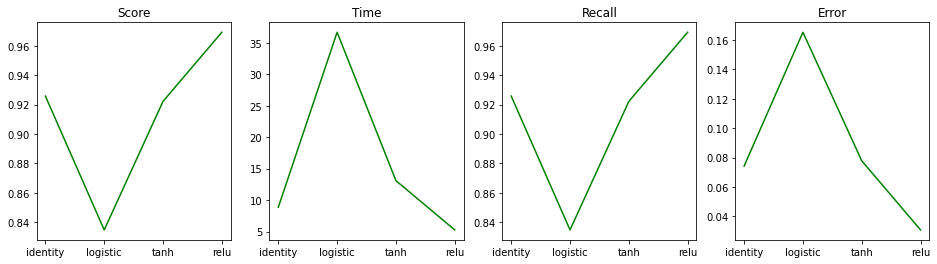

In [132]:
from sklearn.metrics import zero_one_loss
# Varier les fonctions d’activation {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
acti_functions=['identity','logistic','tanh','relu']
scores = []
times = []
recalls = []
errors = []
for af in acti_functions:
    begin = time.time()
    clf = MLPClassifier(hidden_layer_sizes=layers,solver='adam',max_iter = 400, activation=af,verbose=True).fit(xtrain,ytrain)
    end = time.time()
    score = precision_score(clf.predict(data),target.values,average='micro')
    scores.append(score)
    t = end-begin
    times.append(t)
    recall = recall_score(target,clf.predict(data),average='micro')
    recalls.append(recall)
    error = metrics.zero_one_loss(target,clf.predict(data))
    errors.append(error)
    print('Score ' , score )
    print('Recall ' , recall)
    print('Time ' , t)
    print('Error ' , error)
    
plot(acti_functions, scores, times, recalls, errors)


Score  0.975
Recall  0.975
Time  4.100740909576416
Error  0.025000000000000022
Score  0.9678
Recall  0.9678
Time  23.584475994110107
Error  0.032200000000000006
Score  0.9582
Recall  0.9582
Time  3.7891409397125244
Error  0.04179999999999995
Score  0.968
Recall  0.968
Time  13.950372695922852
Error  0.03200000000000003
Score  0.9686
Recall  0.9686
Time  14.631875038146973
Error  0.031399999999999983


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Score  0.9256
Recall  0.9256
Time  33.47178864479065
Error  0.07440000000000002
Score  0.9702
Recall  0.9702
Time  24.386769771575928
Error  0.02980000000000005
Score  0.9806
Recall  0.9806
Time  24.738616943359375
Error  0.019399999999999973
Score  0.9674
Recall  0.9674
Time  26.70945405960083
Error  0.03259999999999996
Score  0.9742
Recall  0.9742
Time  23.613209009170532
Error  0.025800000000000045
Score  0.9786
Recall  0.9786
Time  28.10342001914978
Error  0.021399999999999975


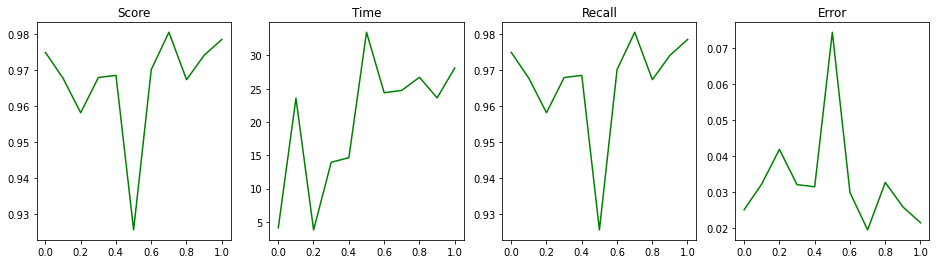

In [133]:
# Varier la valeur de la régularisation L2 (paramètre α).
alphas=[x/1000 for x in range(1,1100,100)]
scores = []
times = []
recalls = []
errors = []
for a in alphas:
    begin = time.time()
    clf = MLPClassifier(hidden_layer_sizes=layers,solver='adam',activation='relu',alpha=a, max_iter = 400 ).fit(xtrain,ytrain)
    end = time.time()
    score = precision_score(clf.predict(data),target.values,average='micro')
    scores.append(score)
    t = end-begin
    times.append(t)
    recall = recall_score(target,clf.predict(data),average='micro')
    recalls.append(recall)
    error = metrics.zero_one_loss(target,clf.predict(data))
    errors.append(error)
    print('Alpha ' , a )
    print('Score ' , score )
    print('Recall ' , recall)
    print('Time ' , t)
    print('Error ' , error)
    
plot(alphas, scores, times, recalls, errors)



In [134]:
# Choisissez le modèle qui propose de meilleurs résultats.
clf = MLPClassifier(hidden_layer_sizes=layers,solver='adam',activation='relu',alpha=1).fit(xtrain,ytrain)
print("Score du modèle optimal : ", precision_score(clf.predict(data),target.values,average='micro'))

Score du modèle optimal :  0.9774


---
### <center> SVM - Machine à Vecteurs Supports </center>
---

In [3]:
from sklearn import svm
from sklearn.datasets import fetch_openml
from sklearn import model_selection
import numpy as np
#Importer MNIST
mnist = fetch_openml('mnist_784')
echantillon = np.random.randint(len(mnist.data),size=5000)
data = mnist.data.values[echantillon]
target = mnist.target[echantillon]

#Diviser la base de données à 70% pour l’apprentissage (training) et à 30% pour les tests
xtrain,  xtest,  ytrain,  ytest  =  model_selection.train_test_split(data,  target, train_size=0.7)

clsvm = svm.SVC(kernel='linear')
clsvm.fit(xtrain,ytrain)



SVC(kernel='linear')

In [11]:
from sklearn.metrics import precision_score
print(precision_score(clsvm.predict(data),target,average='micro'))
print("Précision du train set:",clsvm.score(xtrain,ytrain))
print("Précision du test set:",clsvm.score(xtest,ytest))

0.9748
Précision du train set: 1.0
Précision du test set: 0.916


In [12]:
clsvm = svm.SVC(kernel='poly')
clsvm.fit(xtrain,ytrain)
print(precision_score(clsvm.predict(data),target,average='micro'))
print("Précision du train set:",clsvm.score(xtrain,ytrain))
print("Précision du test set:",clsvm.score(xtest,ytest))

0.9662
Précision du train set: 0.9817142857142858
Précision du test set: 0.93


In [13]:
clsvm = svm.SVC(kernel='rbf')
clsvm.fit(xtrain,ytrain)
print(precision_score(clsvm.predict(data),target,average='micro'))
print("Précision du train set:",clsvm.score(xtrain,ytrain))
print("Précision du test set:",clsvm.score(xtest,ytest))

0.974
Précision du train set: 0.9848571428571429
Précision du test set: 0.9486666666666667


In [14]:
clsvm = svm.SVC(kernel='sigmoid')
clsvm.fit(xtrain,ytrain)
print(precision_score(clsvm.predict(data),target,average='micro'))
print("Précision du train set:",clsvm.score(xtrain,ytrain))
print("Précision du test set:",clsvm.score(xtest,ytest))

0.8568
Précision du train set: 0.8554285714285714
Précision du test set: 0.86


In [15]:
clsvm = svm.SVC(kernel='precomputed')
clsvm.fit(xtrain,ytrain)
print(precision_score(clsvm.predict(data),target,average='micro'))
print("Précision du train set:",clsvm.score(xtrain,ytrain))
print("Précision du test set:",clsvm.score(xtest,ytest))

ValueError: Precomputed matrix must be a square matrix. Input is a 3500x784 matrix.

Temps d'apprentissage:  1.466259241104126
Precision score:  0.9084
Précision du train set: 0.9105714285714286
Précision du test set: 0.9033333333333333
Recall:  0.9084
Temps d'apprentissage:  0.9447593688964844
Precision score:  0.9464
Précision du train set: 0.9525714285714286
Précision du test set: 0.932
Recall:  0.9464
Temps d'apprentissage:  0.812793493270874
Precision score:  0.9598
Précision du train set: 0.9665714285714285
Précision du test set: 0.944
Recall:  0.9598
Temps d'apprentissage:  0.7602639198303223
Precision score:  0.9692
Précision du train set: 0.9788571428571429
Précision du test set: 0.9466666666666667
Recall:  0.9692
Temps d'apprentissage:  0.7264344692230225
Precision score:  0.974
Précision du train set: 0.9848571428571429
Précision du test set: 0.9486666666666667
Recall:  0.974


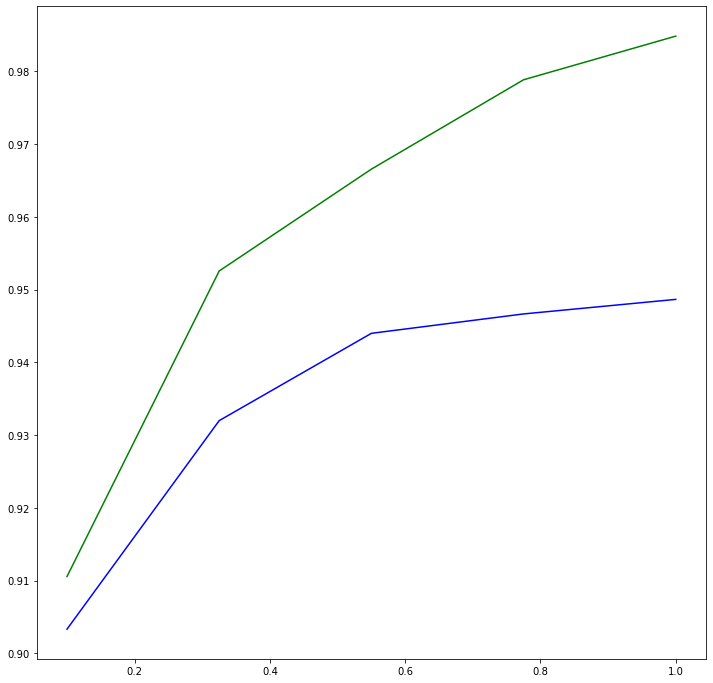

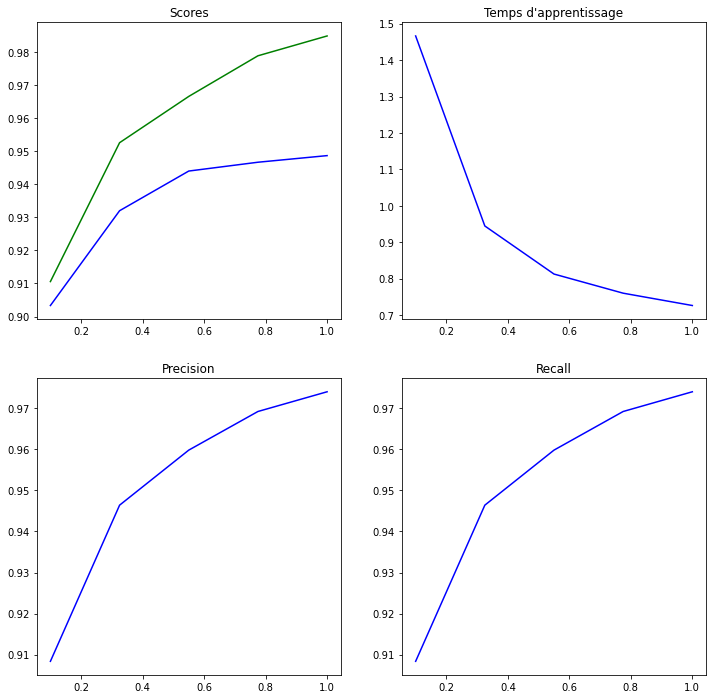

In [25]:
import matplotlib.pyplot as plt 
import time
from sklearn.metrics import recall_score
train_scores=[]
test_scores=[]
appr_time=[]
recalls=[]
precisions=[]
intervalle=np.linspace(0.1, 1, num=5)
for c in intervalle:
    clsvm = svm.SVC(kernel='rbf',C=c)
    start=time.time()
    clsvm.fit(xtrain,ytrain)
    end=time.time()
    appr_time.append(end-start)
    print("Temps d'apprentissage: ",end-start)
    precision=precision_score(target,clsvm.predict(data),average='micro')
    print("Precision score: ",precision)
    precisions.append(precision)
    print("Précision du train set:",clsvm.score(xtrain,ytrain))
    train_scores.append(clsvm.score(xtrain,ytrain))
    print("Précision du test set:",clsvm.score(xtest,ytest))
    test_scores.append(clsvm.score(xtest,ytest))
    recall = recall_score(target,clsvm.predict(data),average='micro')
    recalls.append(recall)
    print("Recall: ", recall)
        

plt.figure(figsize=(12,12))
plt.plot(intervalle,train_scores,"green")
plt.plot(intervalle,test_scores,"blue")
plt.show()

plt.figure(figsize=(12,12))
plt.subplot(221,title="Scores")
plt.plot(intervalle,train_scores,"green")
plt.plot(intervalle,test_scores,"blue")
plt.subplot(222,title="Temps d'apprentissage")
plt.plot(intervalle,appr_time,"blue")
plt.subplot(223,title="Precision")
plt.plot(intervalle,precisions,"blue")
plt.subplot(224,title="Recall")
plt.plot(intervalle,recalls,"blue")
plt.show()


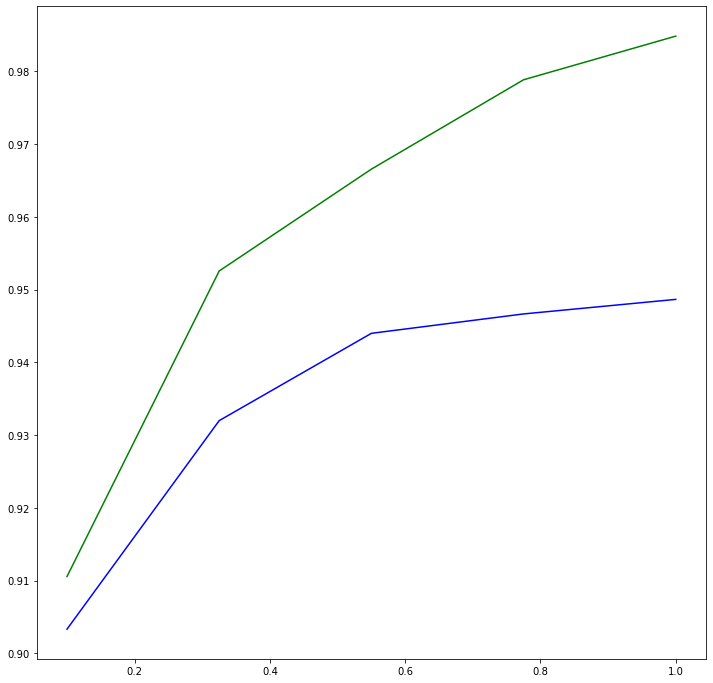

In [19]:
plt.figure(figsize=(12,12))
plt.plot(intervalle,train_scores,"green")
plt.plot(intervalle,test_scores,"blue")
plt.show()  

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target, clsvm.predict(data)) 
print(cm)

[[511   0   0   0   0   1   3   0   1   0]
 [  0 524   0   2   1   1   0   0   1   0]
 [  1   1 523   1   3   0   1   3   2   2]
 [  0   0   2 502   0   8   1   2   3   1]
 [  0   1   1   0 489   0   1   0   0   3]
 [  0   0   1   5   2 411   1   0   2   0]
 [  2   1   0   0   0   4 488   0   0   0]
 [  1   6   4   1   2   0   0 504   0  10]
 [  0   4   3   3   1   1   2   0 511   1]
 [  0   1   1   8   6   1   1   3   5 407]]
